In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read Dataset

In [220]:
df=pd.read_csv("/content/drive/MyDrive/AI Lab/foods.csv")

In [221]:
df.head(3)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1998-07-15,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.4,27.0182
2,1998-07-15,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.6,22.6101


In [222]:
new_df = df[['date','market','latitude','longitude','category','commodity','unit','priceflag','pricetype','currency','price']]

In [223]:
new_df.head()

,date,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price
0,#date,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value
1,1998-07-15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.4
2,1998-07-15,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.6
3,1998-08-15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75
4,1998-08-15,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060


In [224]:
new_df = new_df.drop(index=new_df.index[0])
new_df

,date,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price
1,1998-07-15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.4
2,1998-07-15,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.6
3,1998-08-15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75
4,1998-08-15,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060
5,1998-09-15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.5
...,...,...,...,...,...,...,...,...,...,...,...
15165,2024-08-15,Sunamgonj Sadar,25.072282,91.400318,oil and fats,Oil (palm),L,aggregate,Retail,BDT,136
15166,2024-08-15,Sylhet Sadar,24.890531,91.871936,cereals and tubers,Rice (coarse),KG,aggregate,Retail,BDT,51.5
15167,2024-08-15,Sylhet Sadar,24.890531,91.871936,cereals and tubers,Wheat flour,KG,aggregate,Retail,BDT,60
15168,2024-08-15,Sylhet Sadar,24.890531,91.871936,oil and fats,Oil (palm),L,aggregate,Retail,BDT,137.5


In [225]:
new_df.tail()

,date,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price
15165,2024-08-15,Sunamgonj Sadar,25.072282,91.400318,oil and fats,Oil (palm),L,aggregate,Retail,BDT,136
15166,2024-08-15,Sylhet Sadar,24.890531,91.871936,cereals and tubers,Rice (coarse),KG,aggregate,Retail,BDT,51.5
15167,2024-08-15,Sylhet Sadar,24.890531,91.871936,cereals and tubers,Wheat flour,KG,aggregate,Retail,BDT,60
15168,2024-08-15,Sylhet Sadar,24.890531,91.871936,oil and fats,Oil (palm),L,aggregate,Retail,BDT,137.5
15169,2024-08-15,Sylhet Sadar,24.890531,91.871936,pulses and nuts,Lentils (masur),KG,aggregate,Retail,BDT,134


Sanity check of Dataset

In [226]:
new_df.shape

(15169, 11)

In [227]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15169 entries, 1 to 15169
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       15169 non-null  object
 1   market     15167 non-null  object
 2   latitude   15166 non-null  object
 3   longitude  15167 non-null  object
 4   category   15169 non-null  object
 5   commodity  15169 non-null  object
 6   unit       15169 non-null  object
 7   priceflag  15169 non-null  object
 8   pricetype  15168 non-null  object
 9   currency   15169 non-null  object
 10  price      15165 non-null  object
dtypes: object(11)
memory usage: 1.3+ MB


In [228]:
new_df.isnull().sum()

,0
date,0
market,2
latitude,3
longitude,2
category,0
commodity,0
unit,0
priceflag,0
pricetype,1
currency,0


In [229]:
new_df = new_df.dropna()

In [230]:
new_df.isnull().sum()

,0
date,0
market,0
latitude,0
longitude,0
category,0
commodity,0
unit,0
priceflag,0
pricetype,0
currency,0


In [231]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15158 entries, 1 to 15169
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       15158 non-null  object
 1   market     15158 non-null  object
 2   latitude   15158 non-null  object
 3   longitude  15158 non-null  object
 4   category   15158 non-null  object
 5   commodity  15158 non-null  object
 6   unit       15158 non-null  object
 7   priceflag  15158 non-null  object
 8   pricetype  15158 non-null  object
 9   currency   15158 non-null  object
 10  price      15158 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


In [232]:
for i in new_df.select_dtypes(include="object").columns:
  # print(i)
  print(new_df[i].value_counts())
  print("****"*10)

date
2024-11-15    1036
2024-10-15    1011
2024-12-15     833
2024-09-15     833
2025-01-15     550
              ... 
2001-04-15       1
2001-05-15       1
2001-07-15       1
1998-12-15       1
1998-10-15       1
Name: count, Length: 314, dtype: int64
****************************************
market
Dhaka                  1138
Dhaka Division          490
Chittagong Division     484
Rajshahi Division       478
Khulna Division         472
                       ... 
Meherpur Sadar          112
Chandpur Sadar          110
Madaripur Sadar         104
Patiya Sadar             93
Rangpur Sadar            16
Name: count, Length: 76, dtype: int64
****************************************
latitude
23.81        1138
23.723056     490
22.333056     484
24.366667     478
22.815        472
             ... 
23.768677     112
23.236997     110
23.165678     104
22.298192      93
25.751051      16
Name: count, Length: 76, dtype: int64
****************************************
longitude
90.41        113

In [233]:
new_df.describe()


,date,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price
count,15158,15158,15158,15158,15158,15158,15158,15158,15158,15158,15158
unique,314,76,76,76,8,71,8,3,2,1,5502
top,2024-11-15,Dhaka,23.81,90.41,cereals and tubers,Wheat flour,KG,actual,Retail,BDT,49
freq,1036,1138,1138,1138,6325,3062,10892,8860,14501,15158,181


<h2>Encoding and normalization</h2>


In [234]:
import re


def parse_unit(val):
    if pd.isna(val):
        return None


    match = re.search(r"(\d+\.?\d*)", val)
    number = float(match.group(1)) if match else 1


    val_lower = val.lower()
    if 'g' in val_lower and 'kg' not in val_lower:
        return number / 1000
    return number


new_df['unit_numeric'] = new_df['unit'].apply(parse_unit)
new_df.head(5)


,date,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,unit_numeric
1,1998-07-15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.4,100.0
2,1998-07-15,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.6,100.0
3,1998-08-15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,100.0
4,1998-08-15,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060,100.0
5,1998-09-15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.5,100.0


In [235]:
new_df['date'] = pd.to_datetime(new_df['date'])

# Extract time-based features
new_df['year'] = new_df['date'].dt.year
new_df['month'] = new_df['date'].dt.month
new_df['day'] =new_df['date'].dt.day

new_df['latitude'] = pd.to_numeric(new_df['latitude'], errors='coerce')
new_df['longitude'] = pd.to_numeric(new_df['longitude'], errors='coerce')
new_df['price'] = pd.to_numeric(new_df['price'], errors='coerce')

new_df.head(0)

,date,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,unit_numeric,year,month,day


In [236]:
new_df = new_df[['year','month','day','market','latitude','longitude','category','commodity','unit_numeric','priceflag','pricetype','price']]
new_df.head(3)

,year,month,day,market,latitude,longitude,category,commodity,unit_numeric,priceflag,pricetype,price
1,1998,7,15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100.0,actual,Wholesale,1261.40
2,1998,7,15,Dhaka,23.81,90.41,cereals and tubers,Wheat,100.0,actual,Wholesale,1055.60
3,1998,8,15,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100.0,actual,Wholesale,1288.75


In [237]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15158 entries, 1 to 15169
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          15158 non-null  int32  
 1   month         15158 non-null  int32  
 2   day           15158 non-null  int32  
 3   market        15158 non-null  object 
 4   latitude      15158 non-null  float64
 5   longitude     15158 non-null  float64
 6   category      15158 non-null  object 
 7   commodity     15158 non-null  object 
 8   unit_numeric  15158 non-null  float64
 9   priceflag     15158 non-null  object 
 10  pricetype     15158 non-null  object 
 11  price         15158 non-null  float64
dtypes: float64(4), int32(3), object(5)
memory usage: 1.8+ MB


this time we encode every column seperatly

In [238]:
pip install category_encoders

In [239]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
label_cols = ['priceflag', 'pricetype','category']
le = LabelEncoder()
for col in label_cols:
    new_df[col] = le.fit_transform(new_df[col].astype(str))

# 4. Frequency Encode 'market'
new_df['market_freq'] = new_df['market'].map(new_df['market'].value_counts())
new_df.drop(columns='market', inplace=True)

# 5. Target Encode high-cardinality feature: 'commodity'
target_encoder = ce.TargetEncoder(cols=['commodity'])
new_df['commodity'] = target_encoder.fit_transform(new_df['commodity'], new_df['price'])

encoded_df = new_df.copy()
encoded_df.head(3)

,year,month,day,latitude,longitude,category,commodity,unit_numeric,priceflag,pricetype,price,market_freq
1,1998,7,15,23.81,90.41,0,1571.314254,100.0,0,1,1261.40,1138
2,1998,7,15,23.81,90.41,0,1197.697916,100.0,0,1,1055.60,1138
3,1998,8,15,23.81,90.41,0,1571.314254,100.0,0,1,1288.75,1138


In [240]:
encoded_df = encoded_df[['year','month','day','market_freq','latitude','longitude','category','commodity','unit_numeric','priceflag','pricetype','price']]
encoded_df.head(1)

,year,month,day,market_freq,latitude,longitude,category,commodity,unit_numeric,priceflag,pricetype,price
1,1998,7,15,1138,23.81,90.41,0,1571.314254,100.0,0,1,1261.4


In [241]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15158 entries, 1 to 15169
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          15158 non-null  int32  
 1   month         15158 non-null  int32  
 2   day           15158 non-null  int32  
 3   market_freq   15158 non-null  int64  
 4   latitude      15158 non-null  float64
 5   longitude     15158 non-null  float64
 6   category      15158 non-null  int64  
 7   commodity     15158 non-null  float64
 8   unit_numeric  15158 non-null  float64
 9   priceflag     15158 non-null  int64  
 10  pricetype     15158 non-null  int64  
 11  price         15158 non-null  float64
dtypes: float64(5), int32(3), int64(4)
memory usage: 1.8 MB


<h1>Normalization

In [242]:
from sklearn.preprocessing import MinMaxScaler


numeric_cols = encoded_df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

encoded_df[numeric_cols] = scaler.fit_transform(encoded_df[numeric_cols])

normalized_df = encoded_df.copy()
normalized_df.head(3)

,year,month,day,market_freq,latitude,longitude,category,commodity,unit_numeric,priceflag,pricetype,price
1,1998,7,15,1.0,0.537987,0.530119,0.0,0.897957,1.0,0.0,1.0,0.265075
2,1998,7,15,1.0,0.537987,0.530119,0.0,0.683669,1.0,0.0,1.0,0.221720
3,1998,8,15,1.0,0.537987,0.530119,0.0,0.897957,1.0,0.0,1.0,0.270837


In [243]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15158 entries, 1 to 15169
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          15158 non-null  int32  
 1   month         15158 non-null  int32  
 2   day           15158 non-null  int32  
 3   market_freq   15158 non-null  float64
 4   latitude      15158 non-null  float64
 5   longitude     15158 non-null  float64
 6   category      15158 non-null  float64
 7   commodity     15158 non-null  float64
 8   unit_numeric  15158 non-null  float64
 9   priceflag     15158 non-null  float64
 10  pricetype     15158 non-null  float64
 11  price         15158 non-null  float64
dtypes: float64(9), int32(3)
memory usage: 1.8 MB


In [244]:
normalized_df.describe()

,year,month,day,market_freq,latitude,longitude,category,commodity,unit_numeric,priceflag,pricetype,price
count,15158.000000,15158.000000,15158.0,15158.000000,15158.000000,15158.000000,15158.000000,15158.000000,15158.000000,15158.000000,15158.000000,15158.000000
mean,2020.443594,7.129569,15.0,0.251466,0.515748,0.499591,0.442520,0.103847,0.048301,0.415391,0.043343,0.038694
std,5.199327,3.695452,0.0,0.237655,0.205795,0.268060,0.417209,0.196271,0.202620,0.492755,0.203636,0.112775
min,1998.000000,1.000000,15.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,4.000000,15.0,0.126560,0.339318,0.305616,0.000000,0.031496,0.005025,0.000000,0.000000,0.007769
50%,2023.000000,8.000000,15.0,0.150624,0.523996,0.520441,0.571429,0.062437,0.005025,0.000000,0.000000,0.013108
75%,2024.000000,10.000000,15.0,0.367201,0.656476,0.704624,0.857143,0.074300,0.005025,1.000000,0.000000,0.025382
max,2025.000000,12.000000,15.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


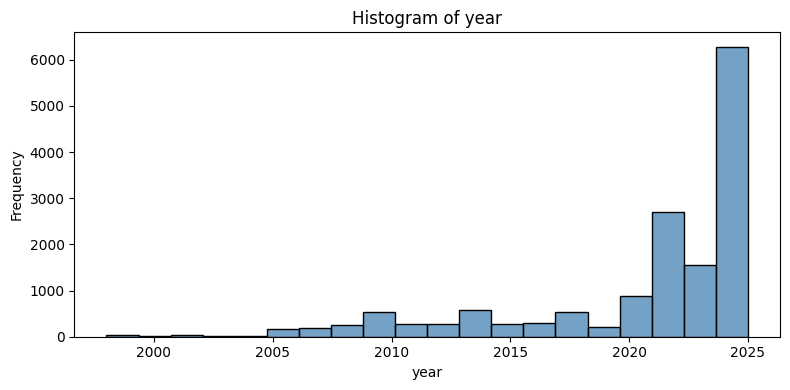

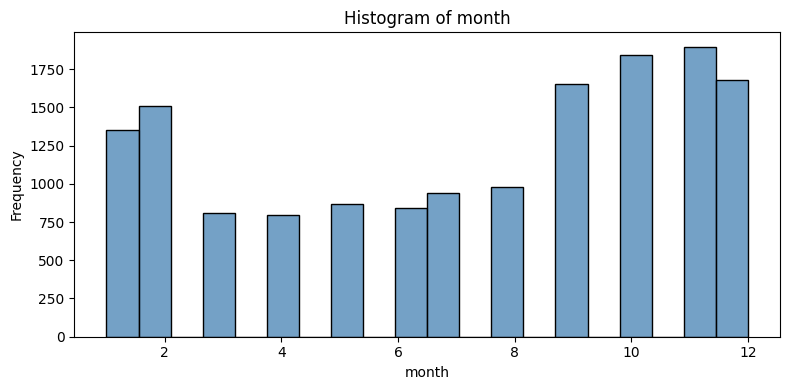

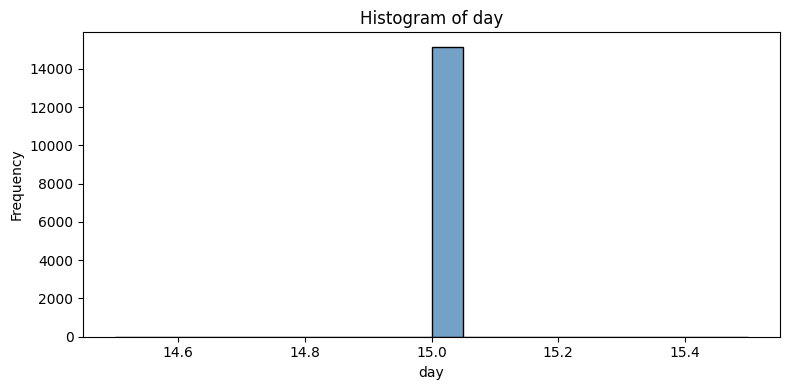

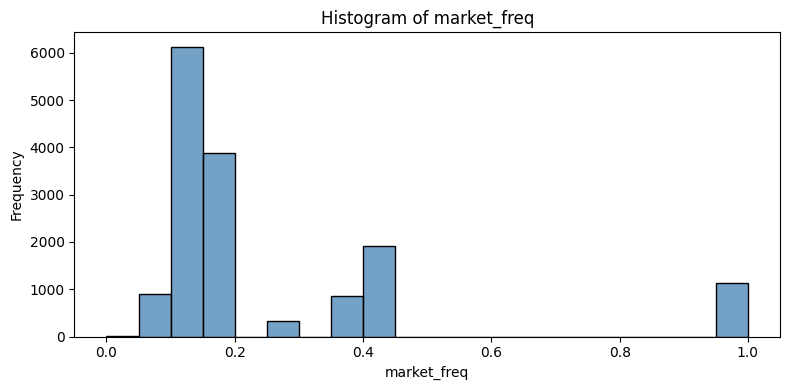

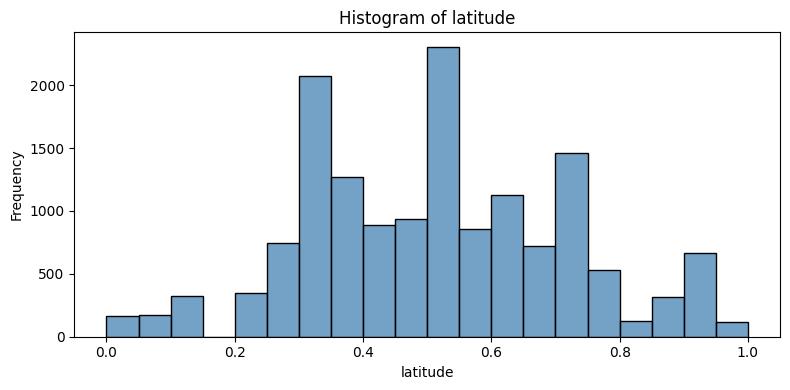

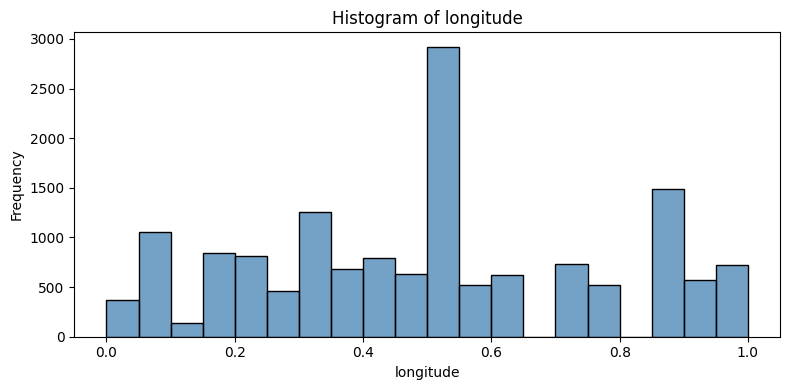

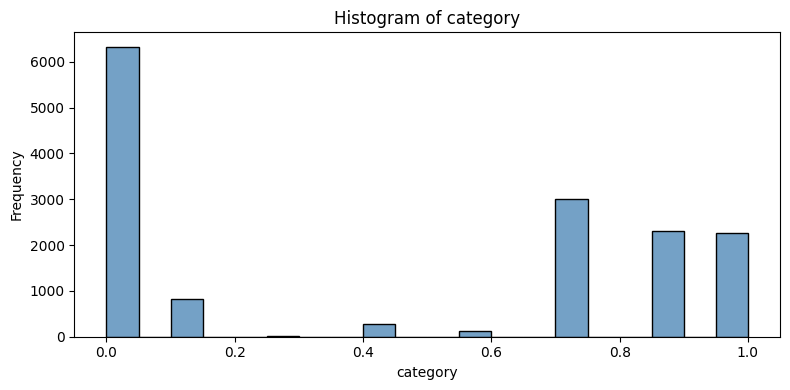

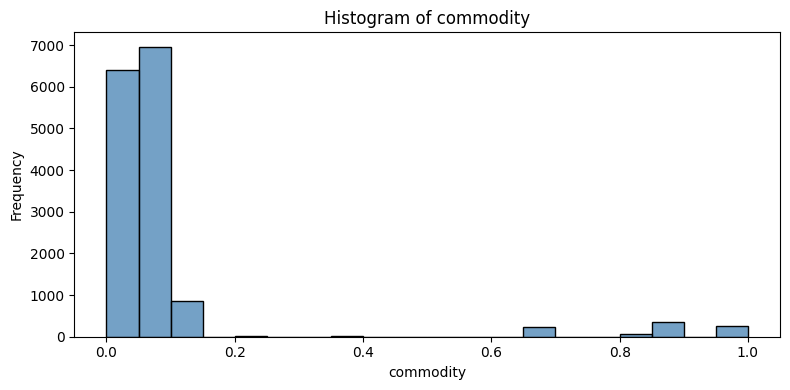

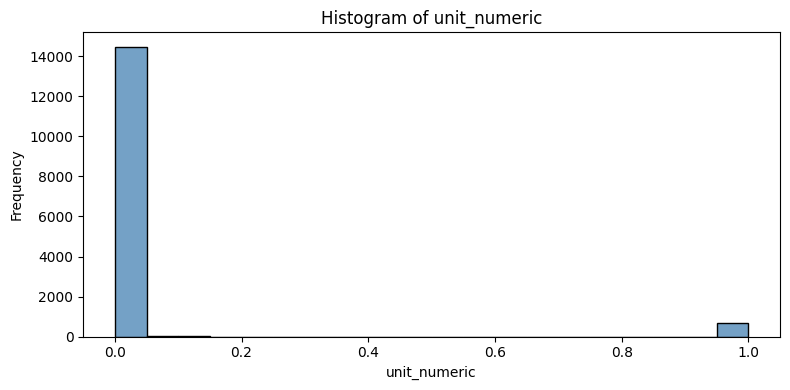

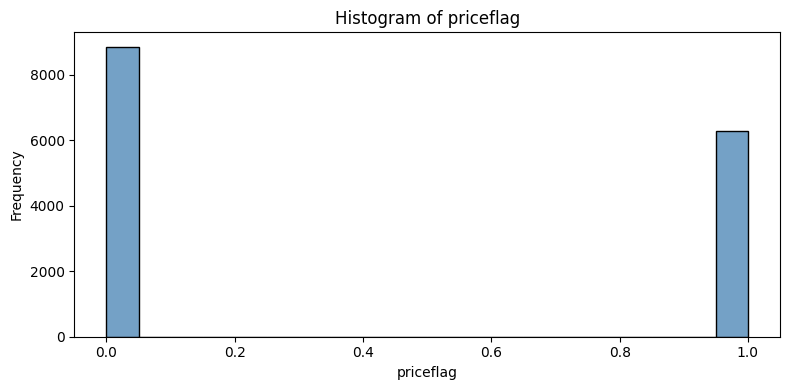

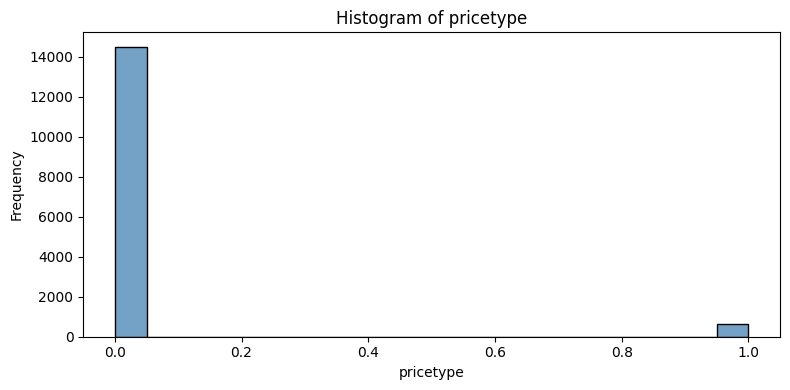

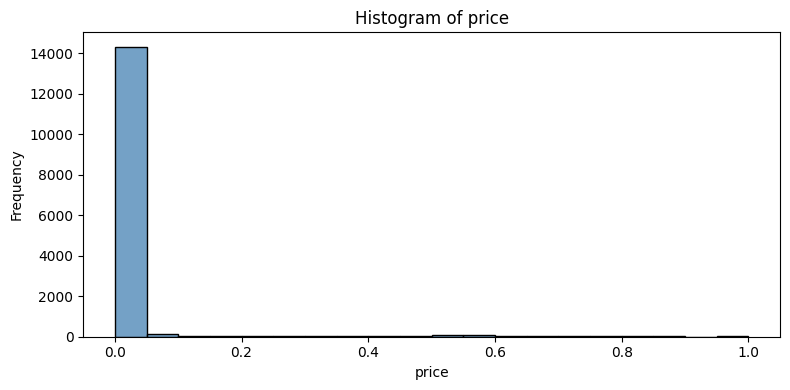

In [245]:
# Plot histograms for each encoded (previously object) column
for col in normalized_df:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=normalized_df, x=col, bins=20, color='steelblue')# kde=True
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

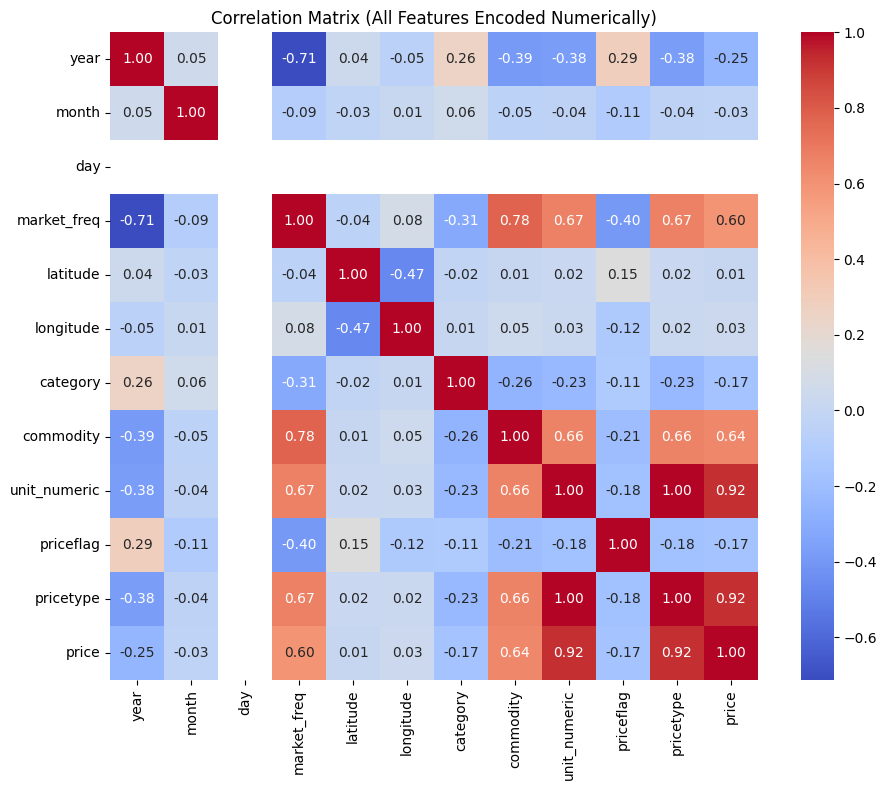

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

correlation_matrix = normalized_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix (All Features Encoded Numerically)")
plt.tight_layout()
plt.show()

In [247]:
final_df = normalized_df[['year','month','day','market_freq','category','commodity','unit_numeric','priceflag','pricetype','price']]
final_df.head(10)

,year,month,day,market_freq,category,commodity,unit_numeric,priceflag,pricetype,price
1,1998,7,15,1.0,0.0,0.897957,1.0,0.0,1.0,0.265075
2,1998,7,15,1.0,0.0,0.683669,1.0,0.0,1.0,0.221720
3,1998,8,15,1.0,0.0,0.897957,1.0,0.0,1.0,0.270837
4,1998,8,15,1.0,0.0,0.683669,1.0,0.0,1.0,0.222647
5,1998,9,15,1.0,0.0,0.897957,1.0,0.0,1.0,0.297539
6,1998,9,15,1.0,0.0,0.683669,1.0,0.0,1.0,0.225765
7,1998,10,15,1.0,0.0,0.897957,1.0,0.0,1.0,0.298065
9,1998,12,15,1.0,0.0,0.683669,1.0,0.0,1.0,0.218171
10,1999,1,15,1.0,0.0,0.897957,1.0,0.0,1.0,0.304427
11,1999,1,15,1.0,0.0,0.683669,1.0,0.0,1.0,0.216117


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [249]:
X = final_df.drop('price', axis=1)
y = final_df['price']

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [251]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [252]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [253]:
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.0015098681027029286


In [254]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.03885702127933803


In [255]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8661503237228378


<H2>Train after shuffling </h2>

In [256]:
df_shuffled = normalized_df[['year','month','day','market_freq','category','commodity','unit_numeric','priceflag','pricetype','price']]

shuffled_final = df_shuffled.sample(frac=1, random_state=42).reset_index(drop=True)


In [257]:
X = final_df.drop('price', axis=1)
y = final_df['price']

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [259]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [262]:
ridge = Ridge(alpha=1, solver='sag', max_iter=1000, tol=1e-4)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1, max_iter=1000, solver='sag')

In [264]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8661503237228378
